<a href="https://colab.research.google.com/github/AyomiUpeksha/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction in Python** 🏰

Data set - Californiya census data
*   Supervised Learning

In [11]:
from ast import increment_lineno
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os


import matplotlib as mpl
import matplotlib.pyplot as plt

2. Importing Data

In [1]:
from google.colab import files
uploaded = files.upload()


Saving housing.csv to housing.csv


In [2]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))
df1 = df.head()

In [3]:
print(df1)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


2. Data Wrangling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


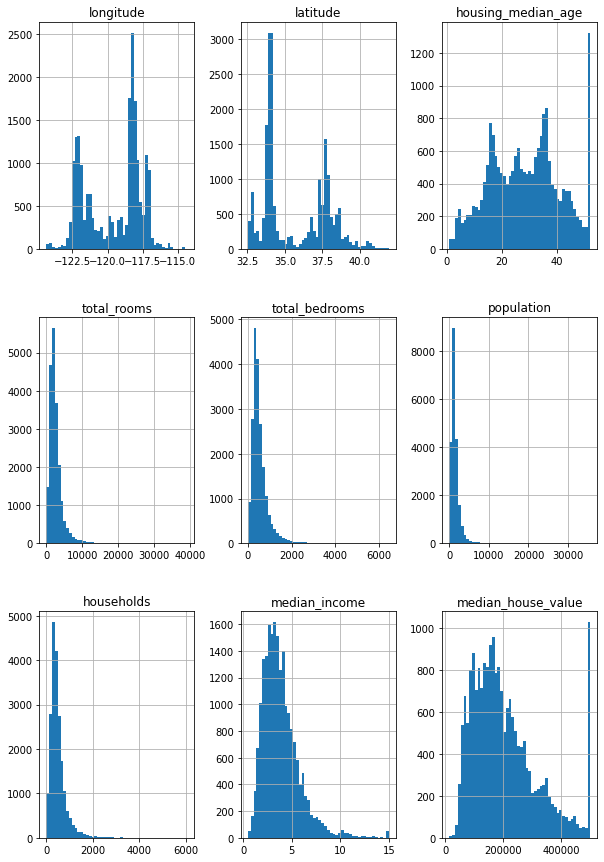

In [14]:
df.hist(bins = 50,figsize = (10,15))
plt.show()

###### *Considering the plots, above variables are positively skewed*

2.1 Oulier Detection - IQR Filtering

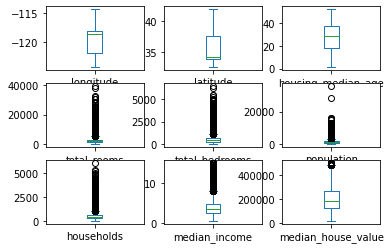

In [15]:
df.plot(kind = "box", subplots = True, layout = (3,3), sharey = False)
plt.show()

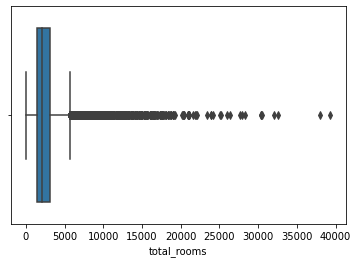

In [23]:
import seaborn as sns
sns.boxplot(x=df['total_rooms']) 

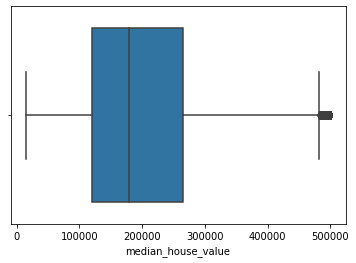

In [30]:
sns.boxplot(x=df['median_house_value']) 

In [31]:
percentile25_total_rooms = df['total_rooms'].quantile(0.25) # Finding IQR for >>>> total_rooms
percentile75_total_rooms = df['total_rooms'].quantile(0.75)

percentile25_total_bedrooms = df['total_bedrooms'].quantile(0.25) # Finding IQR for >>>> total_bedrooms
percentile75_total_bedrooms = df['total_bedrooms'].quantile(0.75)

percentile25_population = df['population'].quantile(0.25) # Finding IQR for >>>> population
percentile75_population = df['population'].quantile(0.75)

percentile25_households = df['households'].quantile(0.25) # Finding IQR for >>>> households
percentile75_households = df['households'].quantile(0.75)

percentile25_median_income = df['median_income'].quantile(0.25) # Finding IQR for >>>> median_income
percentile75_median_income = df['median_income'].quantile(0.75)

percentile25_median_house_value = df['median_house_value'].quantile(0.25) # Finding IQR for >>>> median_house_value
percentile75_median_house_value = df['median_house_value'].quantile(0.75)

In [33]:
iqr_total_rooms = percentile75_total_rooms - percentile25_total_rooms
upper_limit_total_rooms = percentile75_total_rooms + 1.5 * iqr_total_rooms # Finding upper and lower limit >>> total_rooms
lower_limit_total_rooms = percentile25_total_rooms - 1.5 * iqr_total_rooms

iqr_total_bedrooms = percentile75_total_bedrooms - percentile25_total_bedrooms
upper_limit_total_bedrooms = percentile75_total_bedrooms + 1.5 * iqr_total_bedrooms # Finding upper and lower limit >>>> total_bedrooms
lower_limit_total_bedrooms = percentile25_total_bedrooms - 1.5 * iqr_total_bedrooms

iqr_population = percentile75_population - percentile25_population
upper_limit_population = percentile75_population + 1.5 * iqr_population # Finding upper and lower limit >>>> population
lower_limit_population = percentile25_population - 1.5 * iqr_population

iqr_households = percentile75_households - percentile25_households
upper_households = percentile75_households + 1.5 * iqr_households # Finding upper and lower limit >>>> households
lower_households = percentile25_households - 1.5 * iqr_households

iqr_median_income = percentile75_median_income - percentile25_median_income
upper_median_income = percentile75_median_income + 1.5 * iqr_median_income # Finding upper and lower limit >>>> median_income
lower_median_income = percentile25_median_income - 1.5 * iqr_median_income

iqr_median_house_value = percentile75_median_house_value - percentile25_median_house_value
upper_median_house_value = percentile75_median_house_value + 1.5 * iqr_median_house_value # Finding upper and lower limit >>>> median_house_value
lower_median_house_value = percentile25_median_house_value - 1.5 * iqr_median_house_value

In [36]:
df[df['total_rooms'] > upper_limit_total_rooms] # Finding ouliers >>> total_rooms
#df[df['total_rooms'] < lower_limit_total_rooms] ; Since the data are positively skewed we have taken the upper limit only

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY
104,-122.26,37.81,34.0,5871.0,1914.0,2689.0,1789.0,2.8406,335700.0,NEAR BAY
185,-122.23,37.79,43.0,5963.0,1344.0,4367.0,1231.0,2.1917,112800.0,NEAR BAY
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND
20567,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165000.0,INLAND


In [39]:
df[df['total_bedrooms'] > upper_limit_total_bedrooms] # Finding ouliers >>> total_bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20539,-121.71,38.56,20.0,8627.0,1516.0,4071.0,1466.0,4.2198,164100.0,INLAND
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND


In [41]:
df[df['population'] > upper_limit_population] # Finding ouliers >>> population

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
185,-122.23,37.79,43.0,5963.0,1344.0,4367.0,1231.0,2.1917,112800.0,NEAR BAY
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY
460,-122.26,37.87,52.0,1087.0,371.0,3337.0,350.0,1.4012,175000.0,NEAR BAY
485,-122.26,37.86,35.0,5161.0,1744.0,3276.0,1742.0,1.6307,253600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND
20604,-121.54,39.12,17.0,4251.0,899.0,3265.0,934.0,2.3496,65000.0,INLAND


In [44]:
df[df['households'] > upper_households] # Finding ouliers >>> households

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20541,-121.70,38.54,13.0,6819.0,1158.0,2828.0,1115.0,4.6225,226500.0,INLAND
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND


In [46]:
df[df['median_income'] > upper_median_income] # Finding ouliers >>> median_income

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,392600.0,NEAR BAY
134,-122.19,37.83,28.0,1326.0,184.0,463.0,190.0,8.2049,335200.0,NEAR BAY
135,-122.20,37.83,26.0,1589.0,223.0,542.0,211.0,8.4010,351200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20428,-118.83,34.23,6.0,8803.0,1114.0,3385.0,1010.0,8.7288,425800.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [47]:
df[df['median_house_value'] > upper_median_house_value] # Finding ouliers >>> median_house_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
140,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,489600.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [48]:
new_df = df[(df['total_rooms'] < upper_limit_total_rooms) & (df['total_bedrooms'] < upper_limit_total_rooms) & 
            (df['population'] < upper_limit_population) & (df['households'] < upper_households) &
            (df['median_income'] < upper_median_income) & (df['median_house_value'] < upper_median_house_value)]
new_df.shape

(17487, 10)

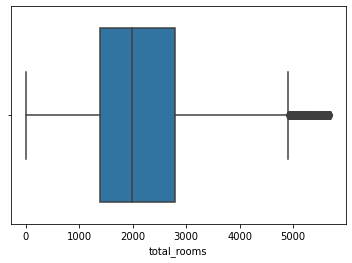

In [50]:
sns.boxplot(x=new_df['total_rooms'])  # compare the plot with previous one

*All the outliers are removed from the dataset and now it's reduced upto 17487 observations.* 😸

3. EDA